This notebook is to help me figure out the scaling of inputs for the adjoint model. Code is based off `~/Research/Carbon_Flux/optimization/testing_adjoint_affine_correct_default_init.ipynb`.

In [1]:
from carbonfluxtools.io_utils import create_gosat_df_year, get_ij
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PseudoNetCDF as pnc
from scipy import stats

In [2]:
BASE_PATH = '/Users/mikestanley/Research/Carbon_Flux'

In [4]:
# read in
with open(BASE_PATH + '/data/testing_adjoint_data/test_17/xco2_modeled.txt', 'rb') as f:
    f_c_orig = np.loadtxt(f)

# scale appropriately
f_c = f_c_orig * 1e6
    
# flip so going from oldest to newest observations
f_c = np.flip(f_c)

print(f_c_orig[:10])
print(f_c[:10])

[0.00038254 0.00038693 0.00038722 0.00038731 0.00038729 0.00038711
 0.0003872  0.00038734 0.00038786 0.00038789]
[386.02160098 386.04329082 386.10872858 386.1235663  386.15169259
 385.96844148 385.74438083 386.15837212 386.44930512 386.51587296]


In [6]:
# gosat observations
GOSAT_DF_FP = BASE_PATH + '/data/generated_gosat/gosat_df_jan1_aug31_2010.csv'
gosat_df = pd.read_csv(GOSAT_DF_FP)

# isolate the gosat observations
y = gosat_df['xco2'].values.copy()
print(y[:10])

[385.59 387.6  385.91 388.07 387.36 385.57 384.06 386.62 387.39 388.69]


In [7]:
# find the difference f(c) - y
diff = f_c - gosat_df['xco2'].values

# find the scaled diff
scl_dff = 1 / (gosat_df['xco2_unc'] ** 2) * diff

#### Distribution of `scl_dff`

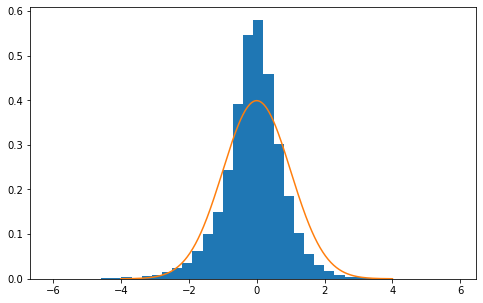

In [8]:
# plot histogram of the forcing terms
plt.figure(figsize=(8, 5))
plt.hist(scl_dff, bins=40, density=True)
x_s = np.linspace(-4, 4, num=500)
plt.plot(x_s, stats.norm.pdf(x_s))
plt.show()

# Scale of true values in code

I.e., in GEOS-Chem, on what numerical scale are operations happening?

In [11]:
xco2_scl_dwn = gosat_df['xco2'] * 1e-6
xco2_unc_scl_dwn = gosat_df['xco2_unc'] * 1e-6
print(xco2_scl_dwn.head())
print(xco2_unc_scl_dwn.head())

0    0.000386
1    0.000388
2    0.000386
3    0.000388
4    0.000387
Name: xco2, dtype: float64
0    1.802800e-06
1    8.791200e-07
2    1.802800e-06
3    1.802800e-06
4    1.802800e-06
Name: xco2_unc, dtype: float64


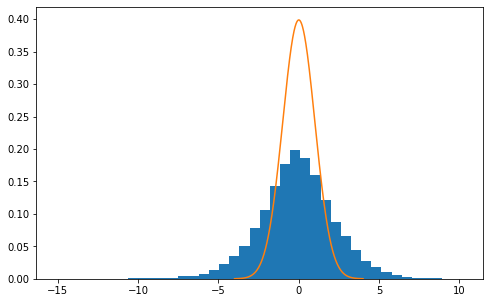

In [15]:
scaled_distr = (1 / xco2_unc_scl_dwn) * (f_c_orig - xco2_scl_dwn)

plt.figure(figsize=(8, 5))
plt.hist(scaled_distr, bins=40, density=True)
x_s = np.linspace(-4, 4, num=500)
plt.plot(x_s, stats.norm.pdf(x_s))
plt.show()